**Import the Necessary Libraries**

In [ ]:
pip install imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek

In [ ]:
from sklearn.datasets import load_breast_cancer



**Load Dataset (Breast Cancer)**

In [ ]:
data= load_breast_cancer()
df= pd.DataFrame(data.data, columns=data.feature_names)
df['target']= data.target

In [ ]:
df.head()

**Mapping Numerical Label to corresponding categories**

In [ ]:
df['target']= df['target'].map({0:'M', 1:'B'})

In [ ]:
df.head()

In [ ]:
df['target'].value_counts()

**Visualization**

In [ ]:
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(10,4))


# Piechart
axes[0].pie(df['target'].value_counts(),labels= df['target'].value_counts().index, autopct='%1.1f%%', startangle=45)
axes[0].set_title('Pie-chart of Before Resampling')


# Countplot

sns.countplot(x='target', data= df, ax= axes[1])
axes[1].set_title('Countplot of Before Resampling')

# Adjust Layout
plt.tight_layout()
plt.show()

In [ ]:
# Split dataset into Features(X) and target(y)

X= df.drop('target', axis=1)
y= df['target']

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=11, test_size=0.2)

**Creating a Function to plot distribution**

In [ ]:
def plot_resampling_results(y_resampled, title):
  plt.figure(figsize=(4,4))
  pd.Series(y_resampled).value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
  plt.title(title)
  plt.show()

In [ ]:
# Random Undersampling

rus= RandomUnderSampler(random_state= 101, sampling_strategy=0.7) # Sampling strategy is ratio of Minority/ Majority observations
X_rus, y_rus= rus.fit_resample(X_train, y_train)
plot_resampling_results(y_rus, 'Class Distribution after Random Undersampling')



**Before Undersampling**

In [ ]:
y_train.value_counts()

**After Undersampling**

In [ ]:
y_rus.value_counts()

In [ ]:
print('No of records removed:', y_train.shape[0]- y_rus.shape[0])

In [ ]:
# Random Oversampling

ros= RandomOverSampler(random_state= 101)
X_ros, y_ros= ros.fit_resample(X_train, y_train)
plot_resampling_results(y_ros, 'Class Distribution after Random Oversampling')

In [ ]:
y_train.value_counts()

In [ ]:
y_ros.value_counts()

In [ ]:
print('No of records added:', y_ros.shape[0]- y_train.shape[0])

In [ ]:
# Tomek Underssampling

tomek= TomekLinks()
X_tl, y_tl = tomek.fit_resample(X_train, y_train)
plot_resampling_results(y_tl, 'Class Distribution after Tomek')

In [69]:
y_train.value_counts()

target
B    281
M    174
Name: count, dtype: int64

In [70]:
y_tl.value_counts()

target
B    271
M    174
Name: count, dtype: int64

In [71]:
print('No of records discarded:', y_train.shape[0]- y_tl.shape[0])

No of records discarded: 10


**SMOTE**

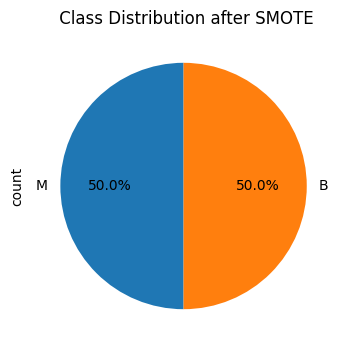

In [73]:
smote= SMOTE(random_state=123)
X_smote, y_smote= smote.fit_resample(X_train, y_train)
plot_resampling_results(y_smote,' Class Distribution after SMOTE')

In [74]:
y_train.value_counts()

target
B    281
M    174
Name: count, dtype: int64

In [75]:
y_smote.value_counts()

target
M    281
B    281
Name: count, dtype: int64

In [76]:
print('No of records added:', y_smote.shape[0]- y_train.shape[0])

No of records added: 107


**Combination of SMOTE & TOMEK**

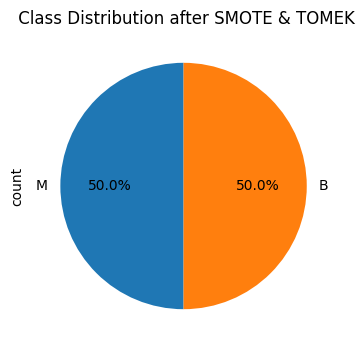

In [78]:
smote_tomek = SMOTETomek(random_state=20)
X_st, y_st= smote_tomek.fit_resample(X_train, y_train)
plot_resampling_results(y_st,' Class Distribution after SMOTE & TOMEK')

In [79]:
y_train.value_counts()

target
B    281
M    174
Name: count, dtype: int64

In [80]:
y_st.value_counts()

target
M    272
B    272
Name: count, dtype: int64

In [81]:
print('No of records added:', y_st.shape[0]- y_train.shape[0])

No of records added: 89


**ADASYN**

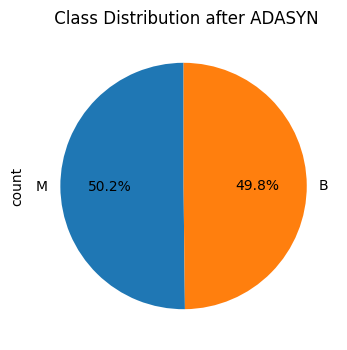

In [82]:
adasyn= ADASYN(random_state=211)
X_adasyn, y_adasyn= adasyn.fit_resample(X_train, y_train)
plot_resampling_results(y_adasyn,' Class Distribution after ADASYN')

In [84]:
y_train.value_counts()

target
B    281
M    174
Name: count, dtype: int64

In [86]:
y_adasyn.value_counts()

target
M    283
B    281
Name: count, dtype: int64

In [87]:
print('No of records added:', y_adasyn.shape[0]- y_train.shape[0])

No of records added: 109
